# Fifa 18 Analysis

In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
sns.set(style = 'dark')
import random
#from collections import Counter as counter
#import os
#import warnings

#warnings.filterwarnings("ignore")
#py.offline.init_notebook_mode(connected = True)

In [76]:
fifa_df = pd.read_csv('Data_Sets/fifa-18-demo-player-dataset/CompleteDataset.csv')

In [77]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [126]:
useful_features = ['Name',
                   'Age',
                   'Photo', 
                   'Nationality', 
                   'Flag',
                   'Overall',
                   'Potential', 
                   'Club', 
                   'Club Logo', 
                   'Value',
                   'Wage',
                   'Preferred Foot',
                   'International Reputation',
                   'Weak Foot',
                   'Skill Moves',
                   'Work Rate',
                   'Body Type',
                   'Position',
                   'Joined', 
                   'Contract Valid Until',
                   'Height',
                   'Weight',
                   'Crossing', 
                   'Finishing',
                   'Heading accuracy',
                   'Short passing', 
                   'Volleys', 
                   'Dribbling',
                   'Curve',
                   'FK accuracy',
                   'Long passing',
                   'Ball control',
                   'Acceleration',
                   'Sprint speed',
                   'Agility',
                   'Reactions', 
                   'Balance',
                   'Shot power', 
                   'Jumping',
                   'Stamina', 
                   'Strength',
                   'Long shots',
                   'Aggression',
                   'Interceptions',
                   'Positioning', 
                   'Vision', 
                   'Penalties',
                   'Composure',
                   'Marking',
                   'Standing tackle', 
                   'Sliding tackle',
                   'GK diving',
                   'GK handling',
                   'GK kicking',
                   'GK positioning',
                   'GK reflexes']

In [127]:
df = pd.DataFrame(fifa_df , columns = useful_features)

 # Analysis

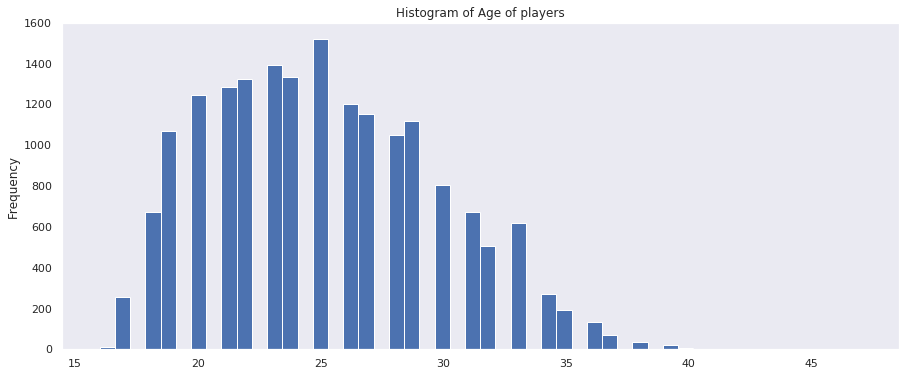

In [128]:
plt.figure(1 , figsize = (15 , 6))
df['Age'].plot(kind = 'hist' , bins = 50)
plt.title('Histogram of Age of players')
plt.show()

## 5 eldest players

In [129]:
df.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality'
                                               ,'Overall', 'Age' ]].head(5)

,Name,Club,Nationality,Overall,Age
17977,B. Richardson,Wycombe Wanderers,England,46,47
5314,E. El Hadary,Al Taawoun,Egypt,70,44
4839,O. Pérez,Pachuca,Mexico,71,44
16834,J. Walker,Lincoln City,England,55,43
16696,D. Coyne,Shrewsbury,Wales,55,43


## 5 youngest players

In [130]:
df.sort_values(by = 'Age' , ascending = True)[['Name','Age','Club','Nationality'
                                               ,'Overall' ]].head(5)

,Name,Age,Club,Nationality,Overall
15837,J. Romero,16,Atlético Tucumán,Argentina,58
17667,J. Hove,16,Sogndal,Norway,51
15571,Javi Vázquez,16,Sevilla Atlético,Spain,58
10556,K. Pierie,16,SC Heerenveen,Netherlands,65
17025,L. Pintor,16,Stade Brestois 29,France,54


In [131]:
#vals = ['Stamina' , 'Strength' , 'Acceleration','SprintSpeed' , 'Agility' , 'Jumping' ,
#       'Vision','Reactions']
#plt.figure(1 , figsize = (15 , 10))
#sns.regplot(x = 'Age' , y = 'Stamina' , data = df)
#plt.show()

### Does Age affect overall rating?

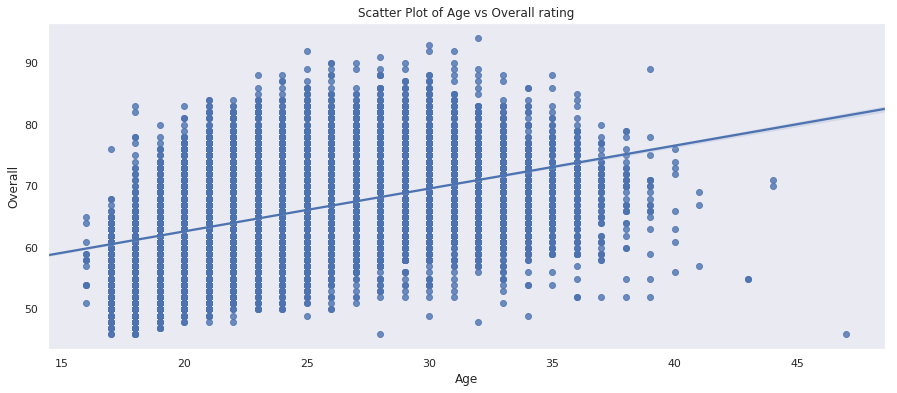

In [132]:
plt.figure(1 , figsize = (15 , 6))
sns.regplot(df['Age'] , df['Overall'])
plt.title('Scatter Plot of Age vs Overall rating')
plt.show()

## Age distribution in few of the famous clubs

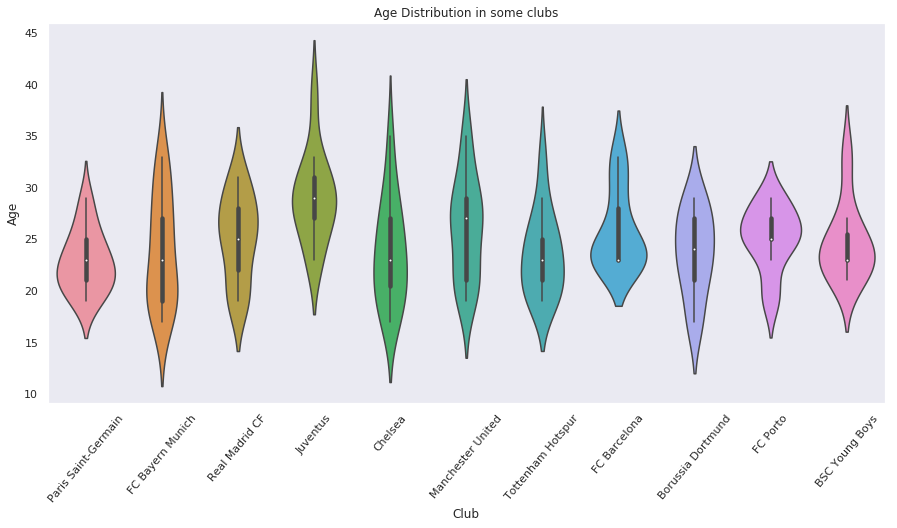

In [133]:
vals = ['Tottenham Hotspur' , 'Juventus' , 'Paris Saint-Germain' ,'FC Bayern Munich',
       'Real Madrid CF' , 'FC Barcelona' , 'Borussia Dortmund' , 'Manchester United' , 
       'FC Porto' , 'Chelsea' , 'BSC Young Boys']
df_club_age = df.loc[df['Club'].isin(vals) & df['Age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Club' , y = 'Age' , data = df_club_age)
plt.title('Age Distribution in some clubs')
plt.xticks(rotation = 50)
plt.show()

## Age distribution in few countries

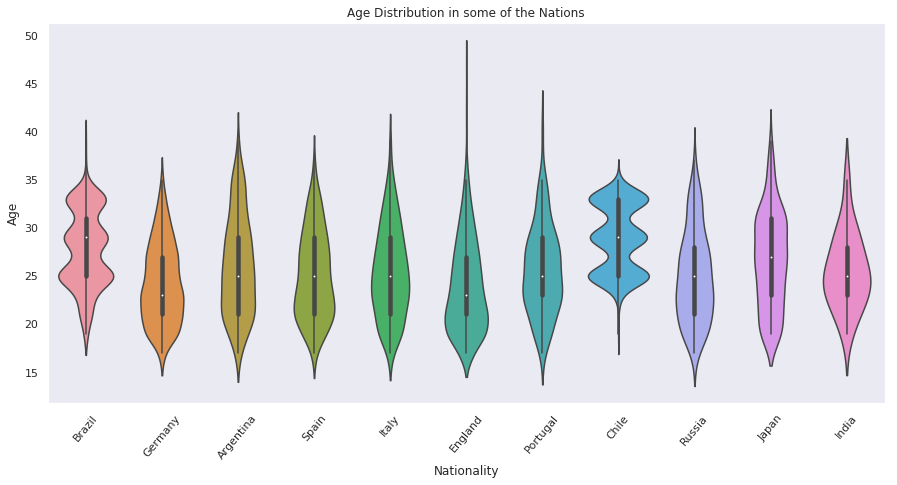

In [134]:
vals = ['England' , 'Brazil' , 'Portugal' ,'Argentina',
       'Italy' , 'Spain' , 'Germany' , 'Russia' , 
       'Chile' , 'Japan' , 'India']
df_club_age = df.loc[df['Nationality'].isin(vals) & df['Age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Nationality' , y = 'Age' , data = df_club_age)
plt.title('Age Distribution in some of the Nations')
plt.xticks(rotation = 50)
plt.show()

### Maximum number of players belong to which country?

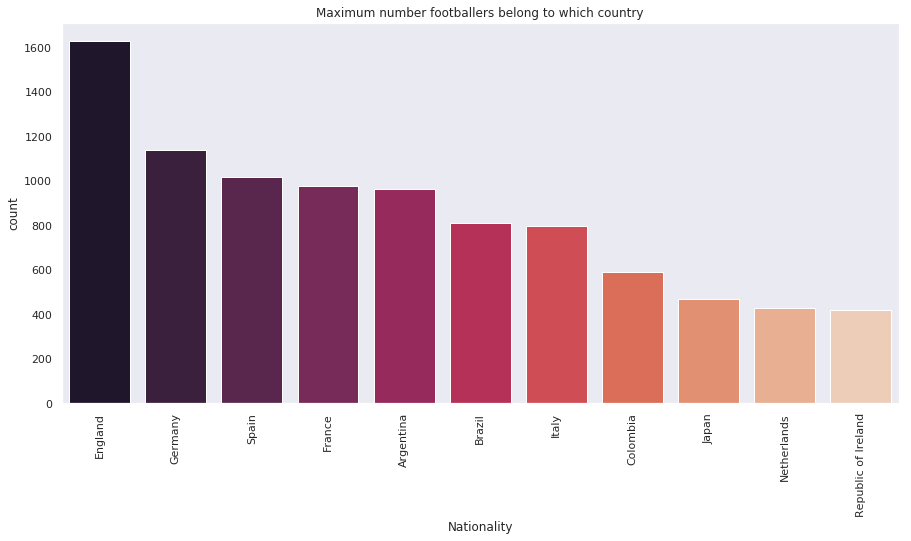

In [135]:
plt.figure(1 , figsize = (15 , 7))
countries = []
c = counter(df['Nationality']).most_common()[:11]
for n in range(11):
    countries.append(c[n][0])

sns.countplot(x  = 'Nationality' ,
              data = df[df['Nationality'].isin(countries)] ,
              order  = df[df['Nationality'].isin(countries)]['Nationality'].value_counts().index , 
             palette = 'rocket') 
plt.xticks(rotation = 90)
plt.title('Maximum number footballers belong to which country' )
plt.show()


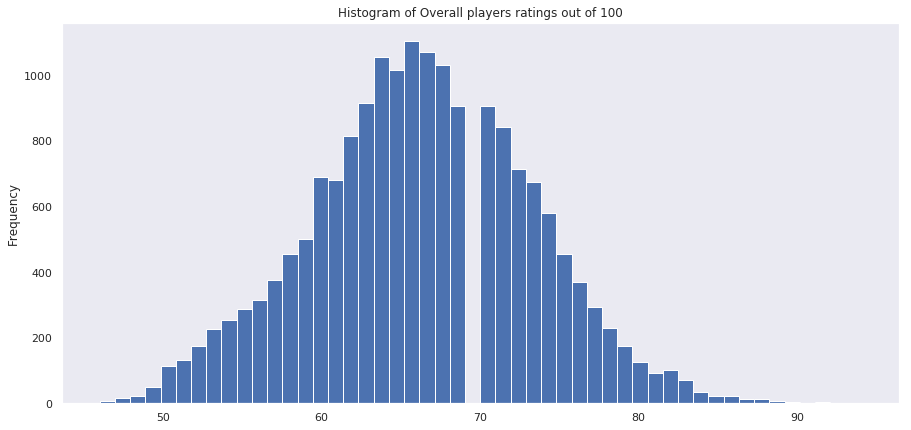

In [136]:
plt.figure(1 , figsize = (15 , 7))
df['Overall'].plot(kind = 'hist' , bins = 50 )
plt.title('Histogram of Overall players ratings out of 100')
plt.show()

## Top 20 players

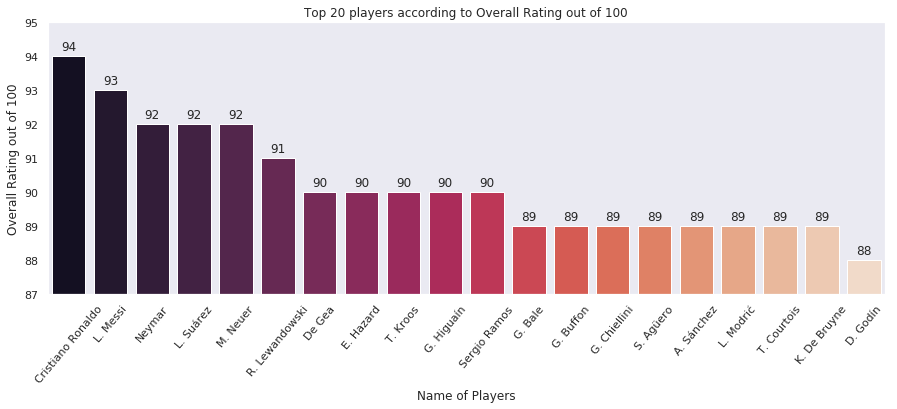

In [137]:
df_best_players = pd.DataFrame.copy(df.sort_values(by = 'Overall' , 
                                                   ascending = False ).head(20))

plt.figure(1 , figsize = (15 , 5))
plots.bar_plot(x ='Name' , y = 'Overall' , data = df_best_players , 
              x_tick_rotation = 50 , xlabel = 'Name of Players' , 
              ylabel = 'Overall Rating out of 100' ,
               title = 'Top 20 players according to Overall Rating out of 100')
plt.ylim(87 , 95)
plt.show()

In [138]:
player_features = ['Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing',
                   'Curve','Dribbling','Finishing','Free kick accuracy','GK diving','GK handling','GK kicking',
                   'GK positioning','GK reflexes','Heading accuracy','Interceptions','Jumping','Long passing',
                   'Long shots','Marking','Penalties','Positioning','Reactions','Short passing','Shot power',
                   'Sliding tackle','Sprint speed','Stamina','Standing tackle','Strength','Vision','Volleys']

## Top 20 clubs with best players?

## Top 10 Countries with best player

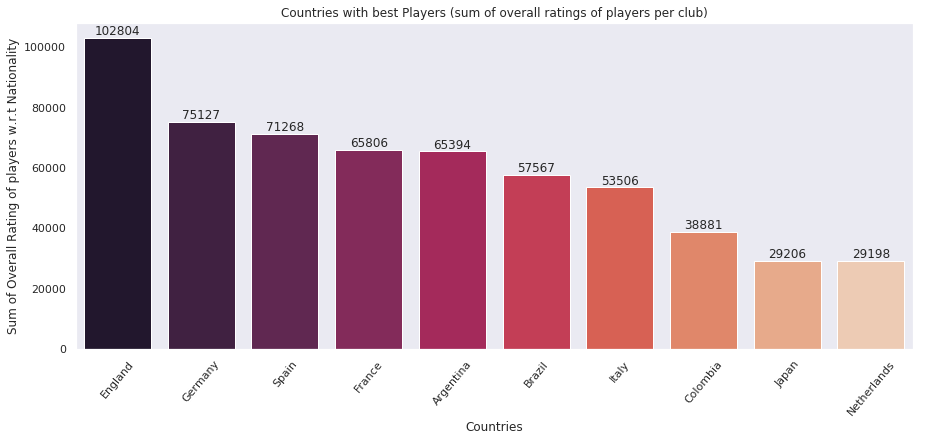

In [141]:
best_dict = {}
for nation in df['Nationality'].unique():
    overall_rating = df['Overall'][df['Nationality'] == nation].sum()
    best_dict[nation] = overall_rating
df_bnp = pd.DataFrame.from_dict(best_dict , orient = 'index' , 
                                                 columns = ['overall'])
df_bnp['nation'] = df_bnp.index
df_bnp = df_bnp.sort_values(by = 'overall' , ascending =  False)

plt.figure(1 , figsize = (15 , 6))
plots.bar_plot(x = 'nation' , y = 'overall' , data = df_bnp.head(10) , 
              x_tick_rotation = 50 , xlabel = 'Countries' , 
              ylabel = 'Sum of Overall Rating of players w.r.t Nationality',
              title = 'Countries with best Players (sum of overall ratings of players per club)')
plt.show()

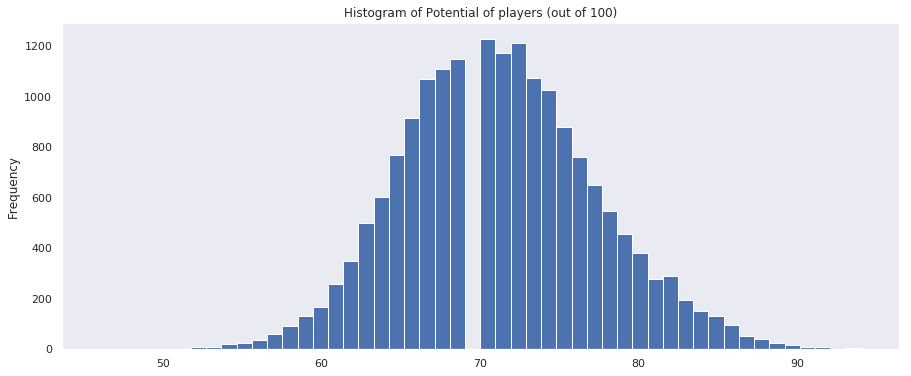

In [92]:
plt.figure(1 , figsize = (15 , 6))
df['Potential'].plot(kind = 'hist' , bins = 50)
plt.title('Histogram of Potential of players (out of 100)')
plt.show()

In [94]:
def cleaning_value(x):
    if '€' in str(x) and 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000
        
    else:
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000
            
    return c

fn = lambda x : cleaning_value(x)

df['Value_num'] = df['Value'].apply(fn)

## Top 5 expensive players to buy.

In [95]:
df.sort_values(by = 'Value_num' , ascending = False)[['Name' , 'Club' , 'Nationality' , 
                                                     'Overall' , 'Value' , 'Wage']].head(5)

,Name,Club,Nationality,Overall,Value,Wage
2,Neymar,Paris Saint-Germain,Brazil,92,€123M,€280K
1,L. Messi,FC Barcelona,Argentina,93,€105M,€565K
3,L. Suárez,FC Barcelona,Uruguay,92,€97M,€510K
0,Cristiano Ronaldo,Real Madrid CF,Portugal,94,€95.5M,€565K
5,R. Lewandowski,FC Bayern Munich,Poland,91,€92M,€355K


## Top 5 player who have great shot power

In [113]:
fifa_df.sort_values(by = 'Shot power' , ascending = False)[['Name' , 'Club' , 'Nationality' ,'Shot power' ]].head(5)

,Name,Club,Nationality,Shot power
0,Cristiano Ronaldo,Real Madrid CF,Portugal,94
502,L. Podolski,Vissel Kobe,Germany,92
277,Naldo,FC Schalke 04,Brazil,92
15,G. Bale,Real Madrid CF,Wales,91
31,Z. Ibrahimović,Manchester United,Sweden,91


## Top 5 players who can give best long passes

In [114]:
fifa_df.sort_values(by = 'Long passing' , ascending = False)[['Name' , 'Club' , 'Nationality' , 
                                                     'Long passing']].head(5)

,Name,Club,Nationality,Long passing
8,T. Kroos,Real Madrid CF,Germany,93
41,I. Rakitić,FC Barcelona,Croatia,92
65,Cesc Fàbregas,Chelsea,Spain,90
22,Thiago,FC Bayern Munich,Spain,90
4560,W. Cestedo,CD Palestino,Chile,9


## Top 5 players who have best vision

In [115]:
fifa_df.sort_values(by = 'Vision' , ascending = False)[['Name' , 'Club' , 'Nationality' , 
                                                     'Vision' ]].head(5)

,Name,Club,Nationality,Vision
45,Iniesta,FC Barcelona,Spain,94
28,M. Özil,Arsenal,Germany,92
42,David Silva,Manchester City,Spain,92
65,Cesc Fàbregas,Chelsea,Spain,91
36,C. Eriksen,Tottenham Hotspur,Denmark,90


## Histograms of player features?

## Shot power used while passing?

 ## Ball Control while dribbling , acceleration and sprint? 

## Finishing at 5 scenarios?

## Top 3 important features per position?

## Top Five important features plot per postion?

# Dream Team According to stats

In [144]:
posi = []
player = []
club_l = []
for col in df_postion.columns:
    tmp_df = pd.DataFrame()
    #print(col)
    l = [df_postion[col].values]
    l = l[0]
    l = list(l)
    l.append('Name')
    tmp_df = pd.DataFrame.copy(df[df['Position'] == col][l])
    tmp_df['mean'] = np.mean(tmp_df.iloc[: , :-1] , axis = 1)
    name = tmp_df['Name'][tmp_df['mean'] == tmp_df['mean'].max()].values[0]
    club = df['Club'][df['Name'] == str(name)].values[0]
    posi.append(col)
    player.append(name)
    club_l.append(club)
    #print('{0} \nClub : {1}'.format(name ,club ) )
gk = ['GK']
forward = ['LS', 'ST', 'RS','LF', 'CF', 'RF']
midfeilder = ['LW','RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
              'RCM', 'RM', 'LDM', 'CDM', 'RDM' ]
defenders = ['LWB','RWB', 'LB', 'LCB', 'CB',]

print('GoalKeeper : ')
for p , n , c in zip(posi , player , club_l):
    if p in gk:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nFORWARD : ')
for p , n , c in zip(posi , player , club_l):
    if p in forward:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nMIDFEILDER : ')
for p , n , c in zip(posi , player , club_l):
    if p in midfeilder:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))
print('\nDEFENDER : ')
for p , n , c in zip(posi , player , club_l):
    if p in defenders:
        print('{} [Club : {} , Position : {}]'.format(n , c , p))

GoalKeeper : 

FORWARD : 

MIDFEILDER : 

DEFENDER : 


In [145]:
CAM = 'H. Nakagawa'
CB = 'D. Godín'
CDM = 'Casemiro'
CF = 'S. Giovinco'
CM = 'N. Keïta'
GK = 'De Gea'
LAM = 'Paulo Daineiro'
LB = 'Jordi Alba'
LCB = 'G. Chiellini'
LCM = 'David Silva'
LDM = 'N. Kanté' 
LF = 'E. Hazard' 
LM = 'Douglas Costa' 
LS = 'J. Martínez' 
LW = 'Neymar Jr' 
LWB = 'M. Pedersen' 
RAM = 'J. Cuadrado' 
RB = 'Nélson Semedo' 
RCB = 'Sergio Ramos' 
RCM = 'L. Modrić' 
RDM = 'P. Pogba' 
RF = 'L. Messi' 
RM = 'Gelson Martins' 
RS = 'A. Saint-Maximin' 
RW = 'R. Sterling' 
RWB = 'M. Millar' 
ST = 'Cristiano Ronaldo' 

In [146]:
def create_football_formation(formation = [] , label_1 = None ,
                              label_2 = None , label_3 = None ,
                              label_4 = None,label_4W = None ,
                              label_5 = None , label_3W = None):
    
    plt.scatter(x = [1] , y = [6] , s = 300 , color = 'blue')
    plt.annotate('De Gea \n(Manchester United)' , (1 - 0.5 , 6 + 0.5))
    plt.plot(np.ones((11 , ))*1.5 , np.arange(1 , 12) , 'w-')
    plt.plot(np.ones((5 , ))*0.5 , np.arange(4 , 9) , 'w-')
    
    n = 0
    for posi in formation:
        if posi ==  1:
            n += 3
            dot = plt.scatter(x = [n]  , y = [6] , s = 400 , color = 'white')
            plt.scatter(x = [n]  , y = [6] , s = 300 , color = 'red')
            for i, txt in enumerate(label_1):
                txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                plt.annotate(txt, ( n-0.5 , 6+0.5))
            
        elif posi == 2:
            n += 3
            y = [5 , 7.5]
            x = [ n , n ]
            plt.scatter(x  , y , s = 400 , color = 'white')
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_2):
                txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')') 
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
        elif posi == 3:
            n+=3
            y = [3.333 , 6.666 , 9.999]
            x = [n , n  , n ]
            plt.scatter(x  , y , s = 400 , color = 'white')
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_3):
                txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
            
            if not label_3W == None:
                n+=3
                y = [3.333 , 6.666 , 9.999]
                x = [n , n  , n ]
                plt.scatter(x  , y , s = 400 , color = 'white')
                plt.scatter(x  , y , s = 300 , color = 'red')
                for i, txt in enumerate(label_3W):
                    txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                    plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
            
        elif posi == 4 and not label_4 == None:
            n+=3
            y = [2.5 , 5 , 7.5 , 10]
            x = [n , n  , n , n ]
            plt.scatter(x  , y , s = 400 , color = 'white')
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_4):
                txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
                
            if not label_4W == None:
                n+=3
                y = [2.5 , 5 , 7.5 , 10]
                x = [n , n  , n , n ]
                plt.scatter(x  , y , s = 400 , color = 'white')
                plt.scatter(x  , y , s = 300 , color = 'red')
                for i, txt in enumerate(label_4W):
                    txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                    plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
                
                
        elif posi == 5:
            n+=3
            y = [2 , 4 , 6 , 8 , 10]
            x = [n , n , n  , n  , n]
            plt.scatter(x  , y , s = 400 , color = 'white')
            plt.scatter(x  , y , s = 300 , color = 'red')
            for i, txt in enumerate(label_5):
                txt = str(txt+'\n('+df['Club'][df['Name'] == txt].values[0]+')')
                plt.annotate(txt, (x[i] - 0.5, y[i]+0.5))
            
    plt.plot(np.ones((5 , ))*(n+0.5) , np.arange(4 , 9) , 'w-')
    plt.plot(np.ones((11 , ))*(n/2) , np.arange(1 , 12) , 'w-')
    plt.yticks([])
    plt.xticks([])
    ax = plt.gca()
    ax.set_facecolor('tab:green')            

## Dream team in different formations 

# Young Dream team according to stats